# Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Training Data

In [2]:
df_train = pd.read_csv("../files/data/SINGLE_CRACK/CORNER_CRACK_COUNTERSUNK_HOLE/CORNER_CRACK_CS2_QUARTER_ELLIPSE_TRAIN.csv")
df_train

,c_index,W/R,a/c,a/t,r/t,b/t,phi,K-T,K-B,K-P
0,0.0,2.0,0.1,0.01,0.667,0.5,0.057972,0.432895,0.846055,0.225341
1,0.0,2.0,0.1,0.01,0.667,0.5,0.069428,0.440853,0.860935,0.229470
2,0.0,2.0,0.1,0.01,0.667,0.5,0.080884,0.450211,0.878774,0.234396
3,0.0,2.0,0.1,0.01,0.667,0.5,0.092340,0.460890,0.898853,0.239942
4,0.0,2.0,0.1,0.01,0.667,0.5,0.103796,0.472418,0.920542,0.245981
...,...,...,...,...,...,...,...,...,...,...
12276859,127883.0,2.6,10.0,0.50,3.000,0.5,1.467062,1.883908,-0.004805,0.934512
12276860,127883.0,2.6,10.0,0.50,3.000,0.5,1.478518,1.854029,-0.005631,0.919696
12276861,127883.0,2.6,10.0,0.50,3.000,0.5,1.489974,1.828710,-0.006347,0.907267
12276862,127883.0,2.6,10.0,0.50,3.000,0.5,1.501431,1.808007,-0.006973,0.897287


In [3]:
# Get unique combinations of the first four columns
train_combinations = df_train.iloc[:, 1:5].drop_duplicates().to_numpy()

print(len(train_combinations))

95913


In [4]:
print("Different W/R values: ", np.unique(train_combinations[:,0], axis=0))
print("Different a/c values: ", np.unique(train_combinations[:,1], axis=0))
print("Different a/t values: ", np.unique(train_combinations[:,2], axis=0))
print("Different r/t values: ", np.unique(train_combinations[:,3], axis=0))
print("Different phi values: ", np.unique(df_train.iloc[:,6], axis=0))

Different W/R values:  [  1.6   1.8   2.    2.2   2.4   2.6   2.8   3.2   3.6   4.    4.6   5.2
   5.8   6.4   7.    8.    9.   10.   12.   16.   20.   30.   40.  100. ]
Different a/c values:  [ 0.1     0.125   0.1667  0.2     0.25    0.333   0.5     0.667   0.75
  0.8     0.9     1.      1.111   1.1111  1.25    1.333   1.5     2.
  3.      6.     10.    ]
Different a/t values:  [0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.2  0.3  0.4  0.5 ]
Different r/t values:  [ 0.1     0.125   0.1428  0.1667  0.2     0.25    0.4     0.4444  0.5
  0.5714  0.667   0.75    0.8     1.      1.25    1.333   1.5     1.75
  2.      2.25    2.5     3.      4.      5.      6.      7.      8.
  9.     10.    ]
Different phi values:  [0.05792282 0.05793267 0.05794252 0.05795237 0.05796221 0.05797206
 0.06937924 0.06938901 0.06939878 0.06940855 0.06941832 0.06942809
 0.08083565 0.08084534 0.08085504 0.08086473 0.08087443 0.08088412
 0.09229206 0.09230168 0.0923113  0.09232092 0.09233053 0.09234015
 0.1

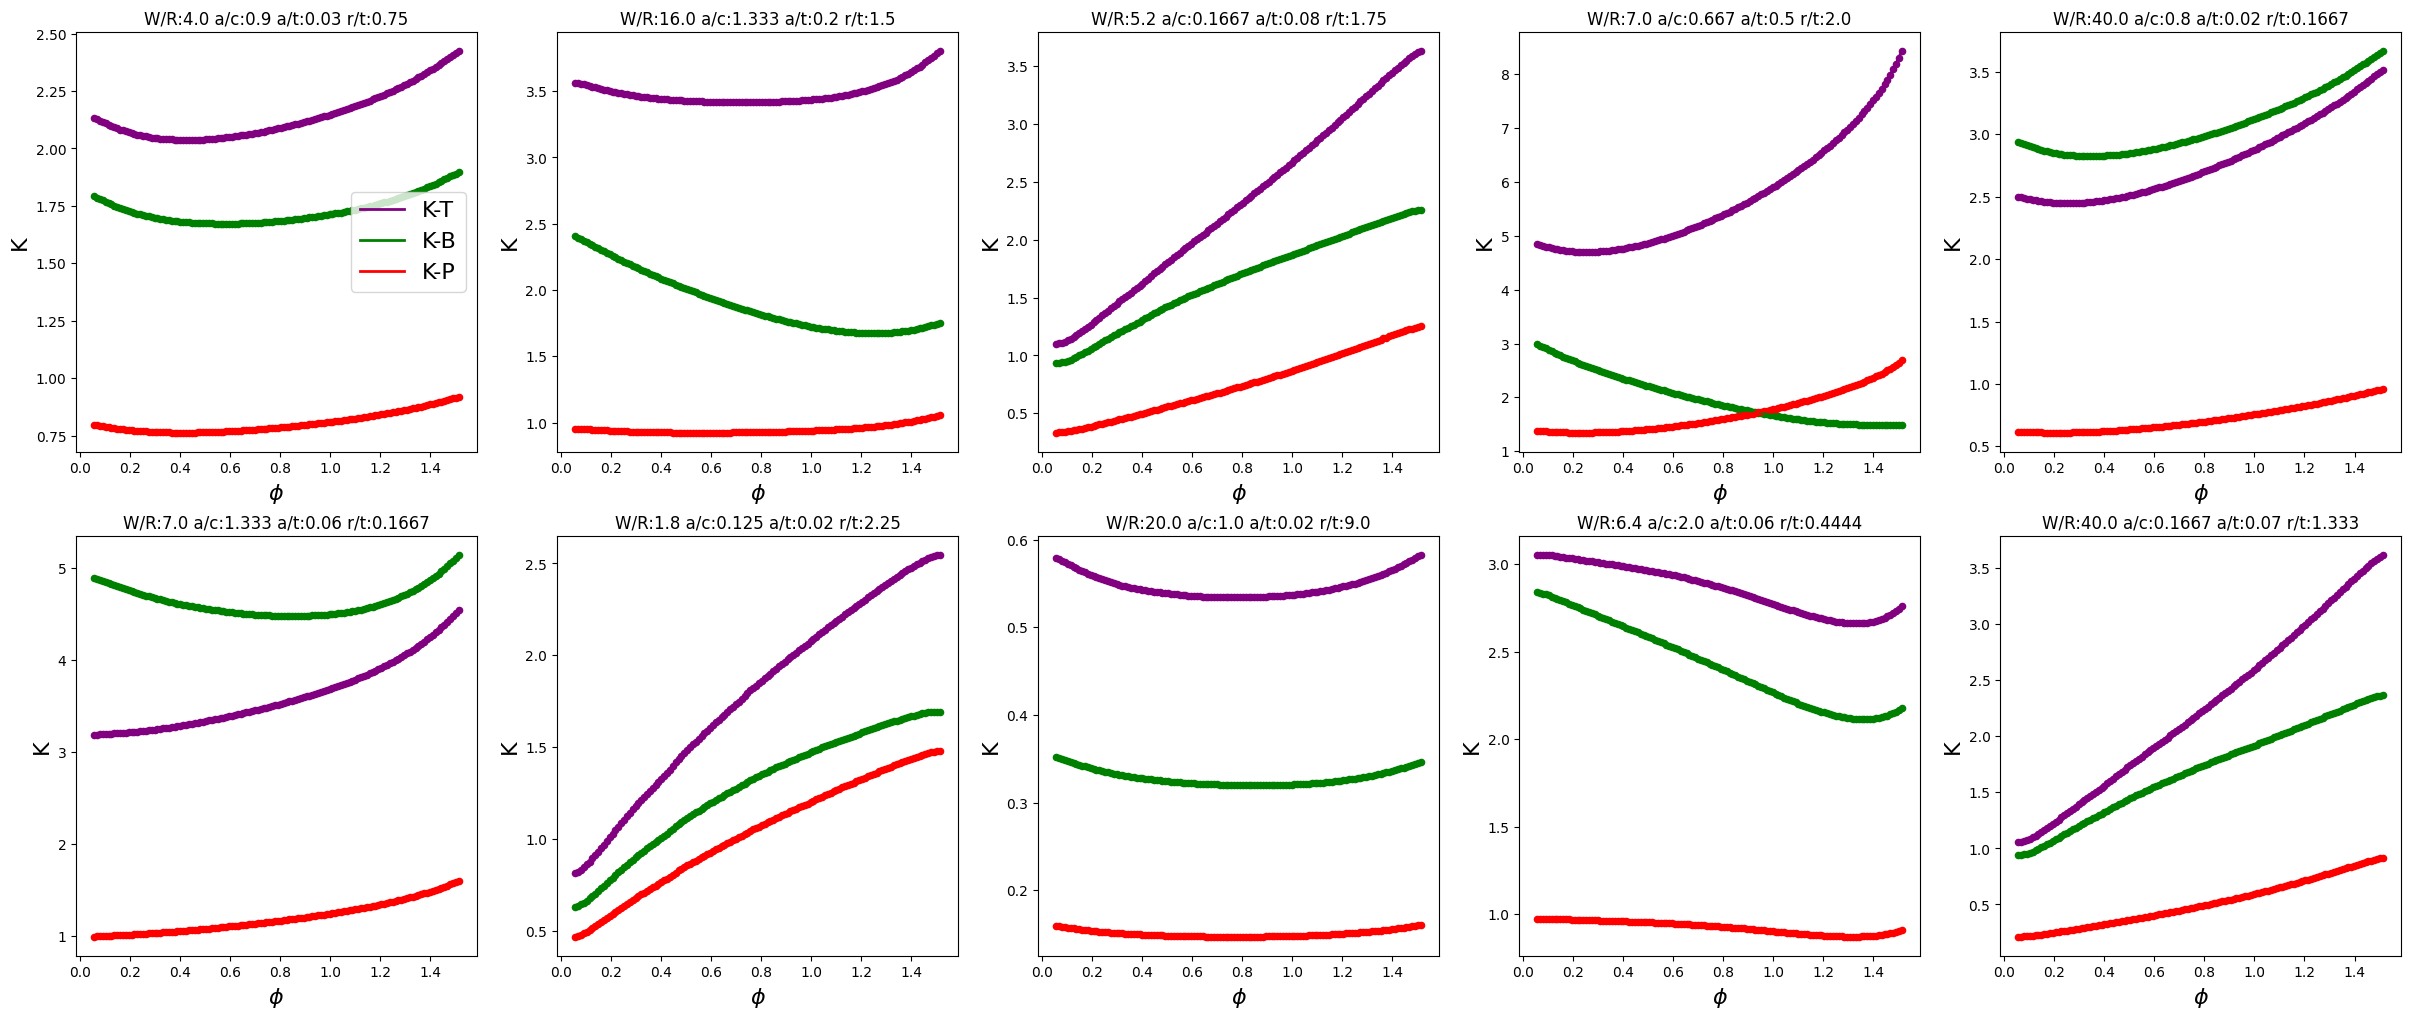

In [5]:
d = df_train.to_numpy()

num_crack = np.unique(d[:,0])

np.random.seed(10)
fig, axs = plt.subplots(2, 5, figsize=(30,12))
for i in range(2):
    for j in range(5):
        idx = np.random.randint(0, len(num_crack))
        data = d[idx*128:idx*128+128]
        W_R = np.unique(data[:,1])
        a_c = np.unique(data[:,2])
        a_t = np.unique(data[:,3])
        r_t = np.unique(data[:,4])

        assert len(W_R) == 1
        assert len(a_c) == 1
        assert len(a_t) == 1
        assert len(r_t) == 1

        axs[i,j].plot(data[:,-4], data[:,-3], label="K-T", color='purple', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-4], data[:,-3], color='purple', s=20)

        axs[i,j].plot(data[:,-4], data[:,-2], label="K-B", color='green', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-4], data[:,-2], color='green', s=20)

        axs[i,j].plot(data[:,-4], data[:,-1], label="K-P", color='red', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-4], data[:,-1], color='red', s=20)

        axs[i,j].set_title("W/R:{} a/c:{} a/t:{} r/t:{}".format(W_R[0], a_c[0], a_t[0], r_t[0]))
        axs[i,j].set_ylabel("K", fontsize=16)
        axs[i,j].set_xlabel(r"$\phi$", fontsize=16)
        
        if i == 0 and j == 0:
            axs[i,j].legend(fontsize=16)

plt.show()

# Testing Data

In [6]:
df_test = pd.read_csv("../files/data/SINGLE_CRACK/CORNER_CRACK_COUNTERSUNK_HOLE/CORNER_CRACK_CS2_QUARTER_ELLIPSE_TEST.csv")
df_test

,c_index,W/R,a/c,a/t,r/t,b/t,phi,K-T,K-B,K-P
0,1.0,2.2,0.1,0.01,0.667,0.5,0.057972,0.491537,0.734077,0.239025
1,1.0,2.2,0.1,0.01,0.667,0.5,0.069428,0.500422,0.746997,0.243364
2,1.0,2.2,0.1,0.01,0.667,0.5,0.080884,0.510990,0.762498,0.248529
3,1.0,2.2,0.1,0.01,0.667,0.5,0.092340,0.523024,0.779883,0.254384
4,1.0,2.2,0.1,0.01,0.667,0.5,0.103796,0.535996,0.798729,0.260757
...,...,...,...,...,...,...,...,...,...,...
4092283,127875.0,2.6,3.0,0.50,3.000,0.5,1.467062,4.856603,0.251691,2.406777
4092284,127875.0,2.6,3.0,0.50,3.000,0.5,1.478518,4.898778,0.251045,2.428429
4092285,127875.0,2.6,3.0,0.50,3.000,0.5,1.489974,4.948769,0.250716,2.452690
4092286,127875.0,2.6,3.0,0.50,3.000,0.5,1.501431,5.009189,0.250951,2.483128


In [7]:
# Get unique combinations of the first four columns
test_combinations = df_test.iloc[:, 1:5].drop_duplicates().to_numpy()

print(len(test_combinations))

31971


In [8]:
print("Different W/R values: ", np.unique(test_combinations[:,0], axis=0))
print("Different a/c values: ", np.unique(test_combinations[:,1], axis=0))
print("Different a/t values: ", np.unique(test_combinations[:,2], axis=0))
print("Different r/t values: ", np.unique(test_combinations[:,3], axis=0))
print("Different phi values: ", np.unique(df_test.iloc[:,6], axis=0))

Different W/R values:  [  1.6   1.8   2.    2.2   2.4   2.6   2.8   3.2   3.6   4.    4.6   5.2
   5.8   6.4   7.    8.    9.   10.   12.   16.   20.   30.   40.  100. ]
Different a/c values:  [ 0.1     0.125   0.1667  0.2     0.25    0.333   0.5     0.667   0.75
  0.8     0.9     1.      1.111   1.1111  1.25    1.333   1.5     2.
  3.      6.     10.    ]
Different a/t values:  [0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.2  0.3  0.4  0.5 ]
Different r/t values:  [ 0.1     0.125   0.1428  0.1667  0.2     0.25    0.4     0.4444  0.5
  0.5714  0.667   0.75    0.8     1.      1.25    1.333   1.5     1.75
  2.      2.25    2.5     3.      4.      5.      6.      7.      8.
  9.     10.    ]
Different phi values:  [0.05792282 0.05793267 0.05794252 0.05795237 0.05796221 0.05797206
 0.06937924 0.06938901 0.06939878 0.06940855 0.06941832 0.06942809
 0.08083565 0.08084534 0.08085504 0.08086473 0.08087443 0.08088412
 0.09229206 0.09230168 0.0923113  0.09232092 0.09233053 0.09234015
 0.1

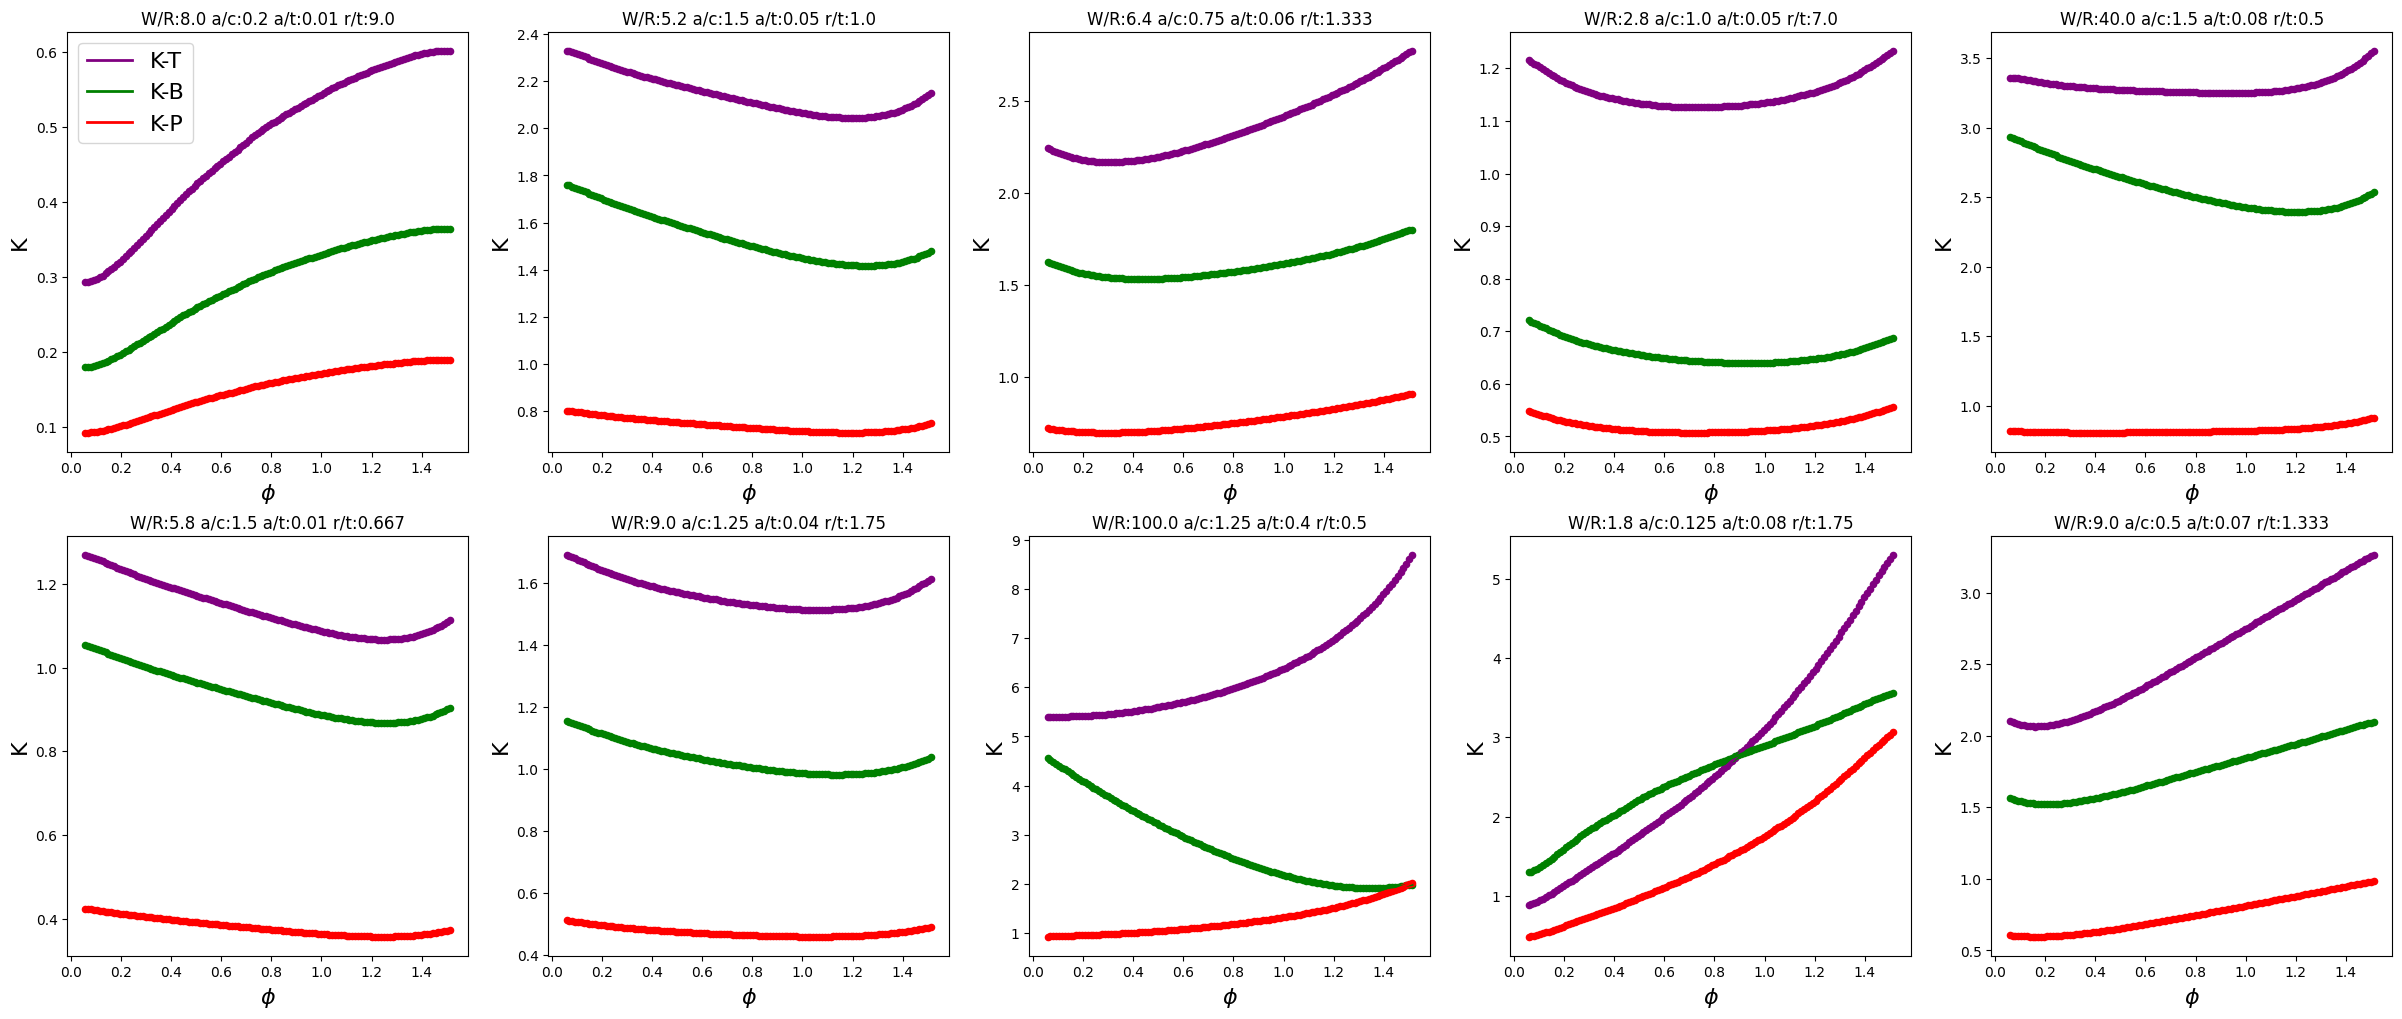

In [9]:
d = df_test.to_numpy()

num_crack = np.unique(d[:,0])

np.random.seed(100)
fig, axs = plt.subplots(2, 5, figsize=(30,12))
for i in range(2):
    for j in range(5):
        idx = np.random.randint(0, len(num_crack))
        data = d[idx*128:idx*128+128]
        W_R = np.unique(data[:,1])
        a_c = np.unique(data[:,2])
        a_t = np.unique(data[:,3])
        r_t = np.unique(data[:,4])

        assert len(W_R) == 1
        assert len(a_c) == 1
        assert len(a_t) == 1
        assert len(r_t) == 1

        axs[i,j].plot(data[:,-4], data[:,-3], label="K-T", color='purple', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-4], data[:,-3], color='purple', s=20)

        axs[i,j].plot(data[:,-4], data[:,-2], label="K-B", color='green', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-4], data[:,-2], color='green', s=20)

        axs[i,j].plot(data[:,-4], data[:,-1], label="K-P", color='red', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-4], data[:,-1], color='red', s=20)

        axs[i,j].set_title("W/R:{} a/c:{} a/t:{} r/t:{}".format(W_R[0], a_c[0], a_t[0], r_t[0]))
        axs[i,j].set_ylabel("K", fontsize=16)
        axs[i,j].set_xlabel(r"$\phi$", fontsize=16)
        
        if i == 0 and j == 0:
            axs[i,j].legend(fontsize=16)

plt.show()